In [5]:
import pandas as pd

df = pd.read_csv('metrics.csv', sep='\t')  # 或尝试 sep=',' 如果你用的是逗号分隔
print("列名是：", df.columns.tolist())


列名是： ['checkpoint,language,Augment,WER,CER,SER']


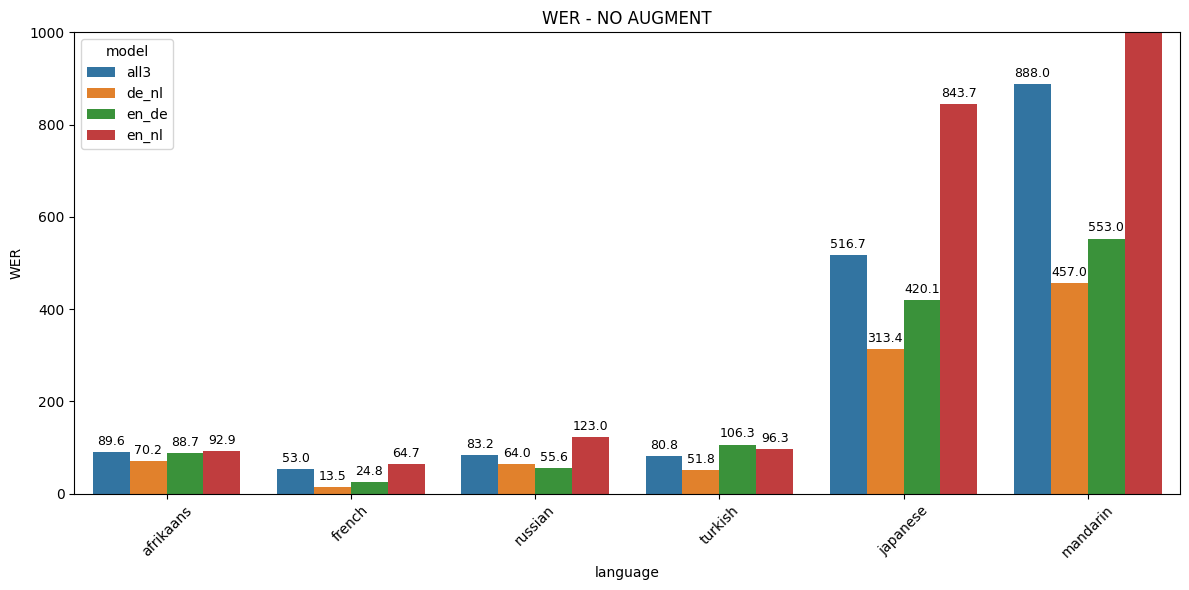

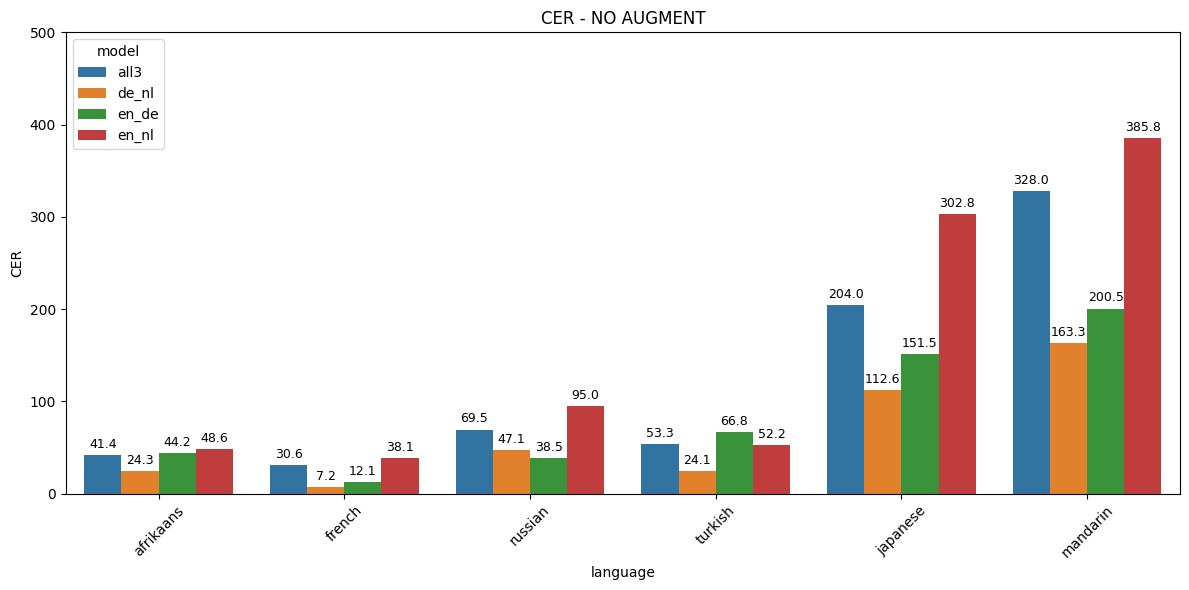

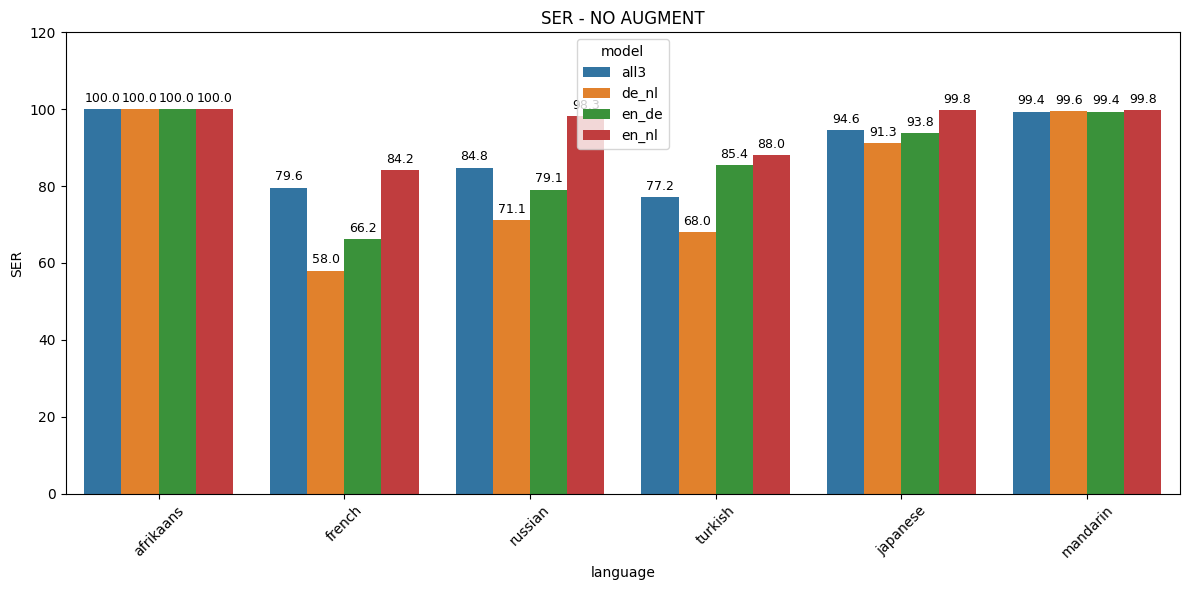

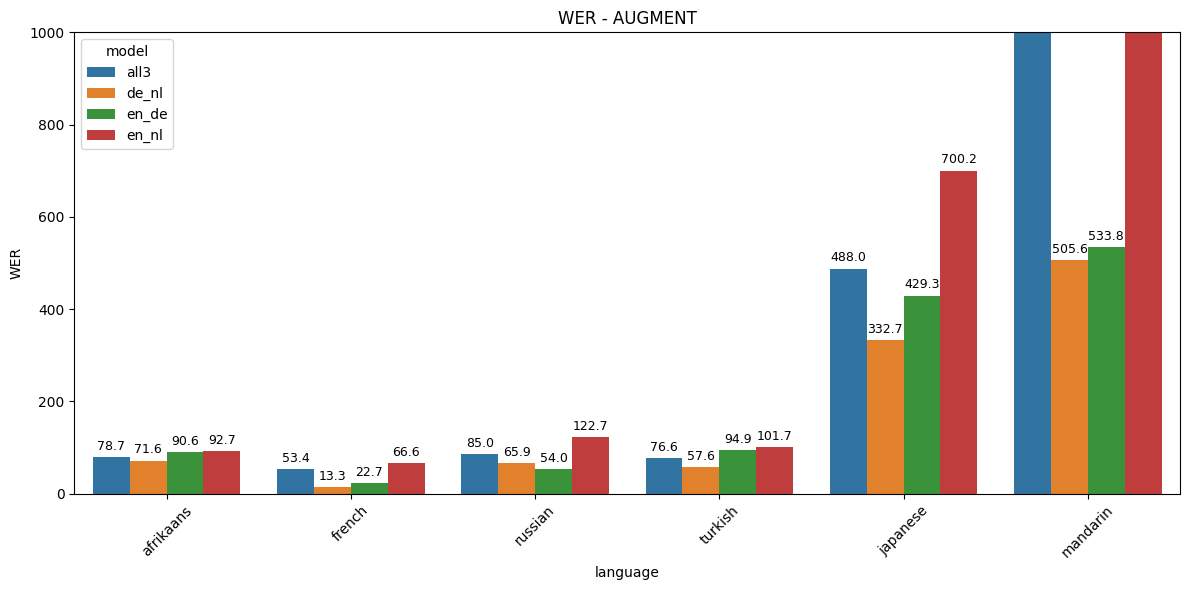

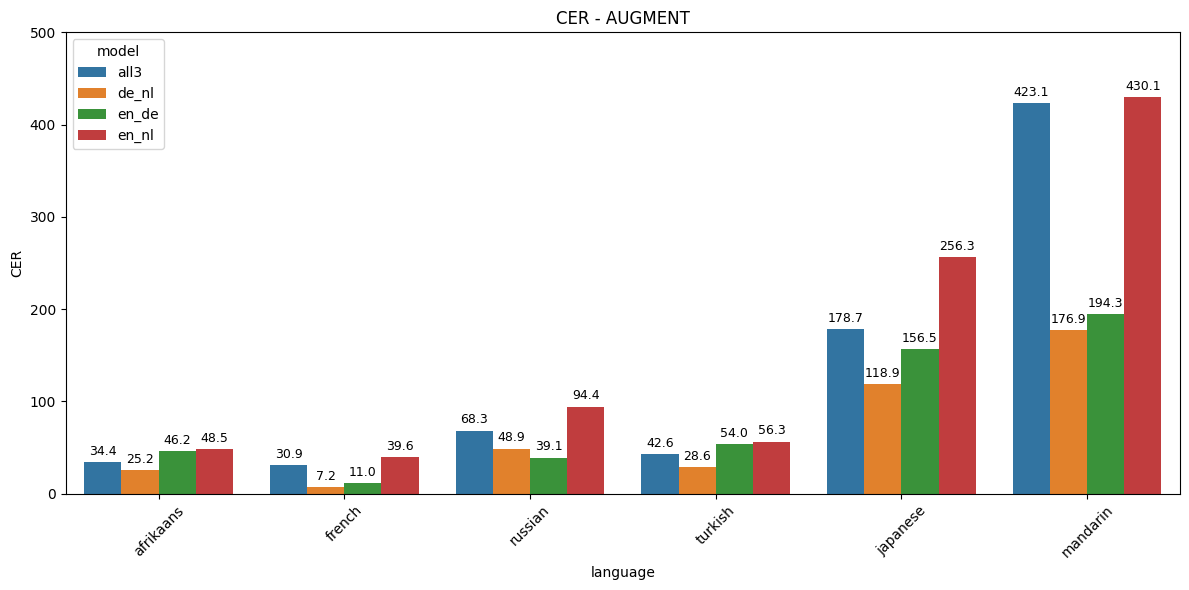

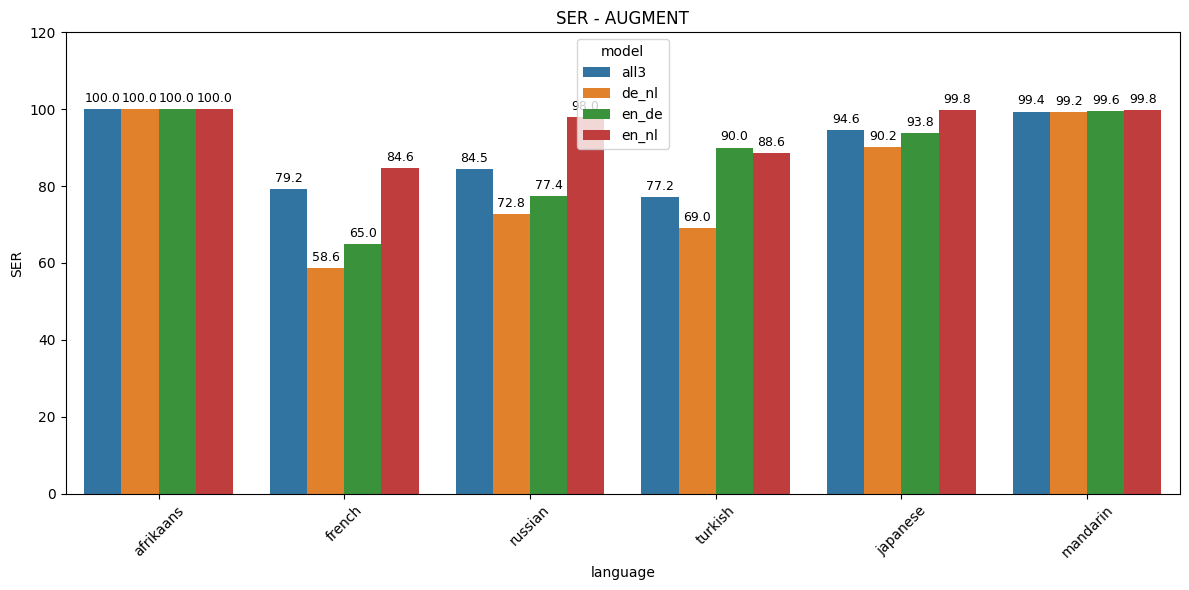

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 CSV 数据
df = pd.read_csv('metrics.csv')
df.columns = df.columns.str.strip()

# 添加模型标签（每 12 行为一个模型）
model_labels = ['all3', 'de_nl', 'en_de', 'en_nl']
df['model'] = [model_labels[i // 12] for i in range(len(df))]

# 标准化布尔列
df['Augment'] = df['Augment'].astype(str).str.lower().map({'true': True, 'false': False})

# 设置语言顺序
language_order = ['afrikaans', 'french', 'russian', 'turkish', 'japanese', 'mandarin']
df['language'] = pd.Categorical(df['language'], categories=language_order, ordered=True)

# 分开数据
df_aug = df[df['Augment'] == True]
df_noaug = df[df['Augment'] == False]

# ✅ 设置每种 metric 的 y 轴最大值
metric_ylim = {
    'WER': 1000,
    'CER': 500,
    'SER': 120
}

# ✅ 画图函数：按指定语言顺序显示 + 在柱子上加数值 + 动态 y 轴
def plot_metric(data, metric, title):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=data, x='language', y=metric, hue='model', order=language_order)
    plt.title(f'{metric} - {title}')
    plt.ylim(0, metric_ylim[metric])
    plt.xticks(rotation=45)

    # 在柱子上显示数值
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3, fontsize=9)

    plt.tight_layout()
    plt.show()

# 🔁 可视化每种指标在 NO AUG / AUG 下的表现
for subset, label in [(df_noaug, 'NO AUGMENT'), (df_aug, 'AUGMENT')]:
    for metric in ['WER', 'CER', 'SER']:
        plot_metric(subset, metric, label)


In [2]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('metrics.csv')
df.columns = df.columns.str.strip()

# Add model identifiers (every 12 rows corresponds to one model)
model_labels = ['all3', 'de_nl', 'en_de', 'en_nl']
df['model'] = [model_labels[i // 12] for i in range(len(df))]

# Normalize the 'Augment' column to boolean
df['Augment'] = df['Augment'].astype(str).str.lower().map({'true': True, 'false': False})

# Split the data by augmentation
df_aug = df[df['Augment'] == True]
df_noaug = df[df['Augment'] == False]

# Merge augmented and non-augmented data by model and language
df_compare = pd.merge(
    df_noaug,
    df_aug,
    on=['model', 'language'],
    suffixes=('_noaug', '_aug')
)

# Calculate improvement (positive = performance improved after augmentation)
df_compare['WER_diff'] = df_compare['WER_noaug'] - df_compare['WER_aug']
df_compare['CER_diff'] = df_compare['CER_noaug'] - df_compare['CER_aug']
df_compare['SER_diff'] = df_compare['SER_noaug'] - df_compare['SER_aug']

# Keep relevant columns
diff_summary = df_compare[['model', 'language', 'WER_diff', 'CER_diff', 'SER_diff']]

# Print the result
print("\nPerformance improvement after augmentation (positive = improved):\n")
print(diff_summary.to_string(index=False))



Performance improvement after augmentation (positive = improved):

model  language    WER_diff   CER_diff  SER_diff
 all3 afrikaans   10.913254   6.990928  0.000000
 all3    french   -0.368550  -0.308551  0.400000
 all3  japanese   28.658537  25.285326  0.000000
 all3   russian   -1.759834   1.180586  0.286533
 all3   turkish    4.183071  10.706638  0.000000
 all3  mandarin -240.000000 -95.115316  0.000000
de_nl afrikaans   -1.348257  -0.876279  0.000000
de_nl    french    0.163800   0.003282 -0.600000
de_nl  japanese  -19.308943  -6.277174  1.037344
de_nl   russian   -1.863354  -1.787883 -1.719198
de_nl   turkish   -5.757874  -4.503926 -1.000000
de_nl  mandarin  -48.600000 -13.506801  0.400000
en_de afrikaans   -1.857034  -1.995754  0.000000
en_de    french    2.047502   1.155424  1.200000
en_de  japanese   -9.146341  -5.095109  0.000000
en_de   russian    1.587302  -0.685031  1.719198
en_de   turkish   11.417323  12.855103 -4.600000
en_de  mandarin   19.200000   6.185689 -0.200000
e